In [1]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.ml.feature import *
from pyspark.ml.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spark = SparkSession.builder.appName("Venezuelan Economy Analyser").getOrCreate()

In [3]:
df = spark.read.csv(r"C:\Users\amith\Documents\GitHub\misc\Venezuela Resource Dependency & Economy(1960-2023)\venezuela_wdi_indicators.csv",header=True,inferSchema=True)

In [4]:
df.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+-----------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|   gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+-----------------+
|         VEN|1960|             NULL|                                NULL|                          NULL|                                     NULL| 7.66393830307171E9|             NULL|
|         VEN|1961|             NULL|                                NULL|                          NULL|                                     NULL| 8.06726703061862E9| 3.19251943889351|
|         VEN|1962|             NULL|                                N

In [5]:
df.printSchema()

root
 |-- country_iso3: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- oil_rents_pct_gdp: double (nullable = true)
 |-- total_natural_resource_rents_pct_gdp: double (nullable = true)
 |-- fuel_exports_pct_merch_exports: double (nullable = true)
 |-- ores_and_metals_exports_pct_merch_exports: double (nullable = true)
 |-- gdp_current_usd: double (nullable = true)
 |-- gdp_growth_pct: double (nullable = true)



In [6]:
df_description = df.describe()
df_count = df_description.filter(col("summary") == "count")

df_count_null = pd.DataFrame(columns=df_count.columns[1:])
for i in df.columns:
    df_count_null.loc[0,i] = df.count() - int(df_count.select(i).first()[0])
    df_count_null.loc[1,i] = np.round(((df.count() - int(df_count.select(i).first()[0]))/df.count())*100,2)

df_count_null.to_csv(r"C:\Users\amith\Documents\GitHub\misc\Venezuela Resource Dependency & Economy(1960-2023)\amith.csv",index=False)
df_count_null = spark.read.csv(r"C:\Users\amith\Documents\GitHub\misc\Venezuela Resource Dependency & Economy(1960-2023)\amith.csv",header=True,inferSchema=True)

#df_count_null = spark.createDataFrame(df_count_null)
df_count_null.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------+--------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_usd|gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------+--------------+
|         0.0| 0.0|             20.0|                                20.0|                          16.0|                                     16.0|            0.0|           1.0|
|         0.0| 0.0|            30.77|                               30.77|                         24.62|                                    24.62|            0.0|          1.54|
+------------+----+-----------------+------------------------------------+------------------------------+

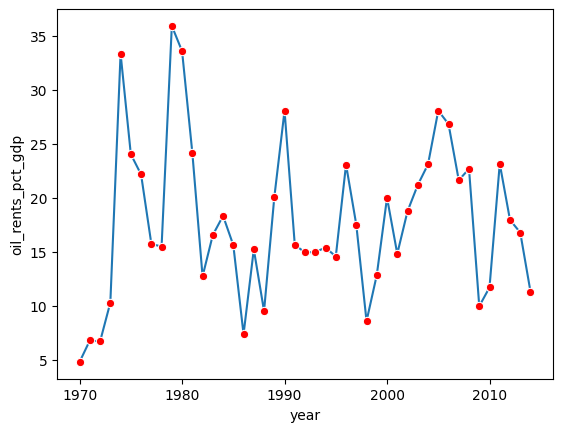

In [7]:
df_pd = df.toPandas()
ax = sns.lineplot(x=df_pd["year"],y=df_pd["oil_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")

In [8]:
df.agg(percentile_approx(col("oil_rents_pct_gdp"),[0.1])).first()[0][0]

8.57137562243914

In [9]:
df.printSchema()

root
 |-- country_iso3: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- oil_rents_pct_gdp: double (nullable = true)
 |-- total_natural_resource_rents_pct_gdp: double (nullable = true)
 |-- fuel_exports_pct_merch_exports: double (nullable = true)
 |-- ores_and_metals_exports_pct_merch_exports: double (nullable = true)
 |-- gdp_current_usd: double (nullable = true)
 |-- gdp_growth_pct: double (nullable = true)



In [10]:
df_proper = df.filter((col("year")>=1970) & (col("year")<=2014))
df_proper.show(df_proper.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|    gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|         VEN|1970| 4.79927244945126|                    5.48772130601331|              91.0159714248327|                         5.80784544796093|1.15611111111111E10|  7.71191438124387|
|         VEN|1971| 6.78719222962612|                    7.38794104909662|              91.5238450151192|                         5.50373167972084|1.29865909090909E10|  1.47929120998987|
|         VEN|1972| 6.69174635347221|                    7.192719

In [11]:
print(len(df_proper.columns[2:]))

6


In [12]:
print("oil_rents_pct_gdp :  ",df_proper.agg(sum(when(col("oil_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("total_natural_resource_rents_pct_gdp :  ",df_proper.agg(sum(when(col("total_natural_resource_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("fuel_exports_pct_merch_exports :  ",df_proper.agg(sum(when(col("fuel_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("ores_and_metals_exports_pct_merch_exports :  ",df_proper.agg(sum(when(col("ores_and_metals_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_current_usd :  ",df_proper.agg(sum(when(col("gdp_current_usd").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_growth_pct :  ",df_proper.agg(sum(when(col("gdp_growth_pct").isNull(),1).otherwise(0))).first()[0])

oil_rents_pct_gdp :   0

total_natural_resource_rents_pct_gdp :   0

fuel_exports_pct_merch_exports :   4

ores_and_metals_exports_pct_merch_exports :   4

gdp_current_usd :   0

gdp_growth_pct :   0


In [13]:
df_proper_1 = df_proper.withColumn("fuel_exports_pct_merch_exports",when(col("fuel_exports_pct_merch_exports").isNull(),df_proper.agg(median(col("fuel_exports_pct_merch_exports"))).first()[0]).otherwise(col("fuel_exports_pct_merch_exports")))

df_proper_1 = df_proper_1.withColumn("ores_and_metals_exports_pct_merch_exports",when(col("ores_and_metals_exports_pct_merch_exports").isNull(),df_proper_1.agg(median(col("ores_and_metals_exports_pct_merch_exports"))).first()[0]).otherwise(col("ores_and_metals_exports_pct_merch_exports")))


df_proper_1.show(df_proper_1.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|    gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|         VEN|1970| 4.79927244945126|                    5.48772130601331|              91.0159714248327|                         5.80784544796093|1.15611111111111E10|  7.71191438124387|
|         VEN|1971| 6.78719222962612|                    7.38794104909662|              91.5238450151192|                         5.50373167972084|1.29865909090909E10|  1.47929120998987|
|         VEN|1972| 6.69174635347221|                    7.192719

In [14]:
print("oil_rents_pct_gdp :  ",df_proper_1.agg(sum(when(col("oil_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("total_natural_resource_rents_pct_gdp :  ",df_proper_1.agg(sum(when(col("total_natural_resource_rents_pct_gdp").isNull(),1).otherwise(0))).first()[0])
print()
print("fuel_exports_pct_merch_exports :  ",df_proper_1.agg(sum(when(col("fuel_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("ores_and_metals_exports_pct_merch_exports :  ",df_proper_1.agg(sum(when(col("ores_and_metals_exports_pct_merch_exports").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_current_usd :  ",df_proper_1.agg(sum(when(col("gdp_current_usd").isNull(),1).otherwise(0))).first()[0])
print()
print("gdp_growth_pct :  ",df_proper_1.agg(sum(when(col("gdp_growth_pct").isNull(),1).otherwise(0))).first()[0])

oil_rents_pct_gdp :   0

total_natural_resource_rents_pct_gdp :   0

fuel_exports_pct_merch_exports :   0

ores_and_metals_exports_pct_merch_exports :   0

gdp_current_usd :   0

gdp_growth_pct :   0


In [15]:
df_proper_1.show(df_proper_1.count())

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|    gdp_current_usd|    gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+-------------------+------------------+
|         VEN|1970| 4.79927244945126|                    5.48772130601331|              91.0159714248327|                         5.80784544796093|1.15611111111111E10|  7.71191438124387|
|         VEN|1971| 6.78719222962612|                    7.38794104909662|              91.5238450151192|                         5.50373167972084|1.29865909090909E10|  1.47929120998987|
|         VEN|1972| 6.69174635347221|                    7.192719

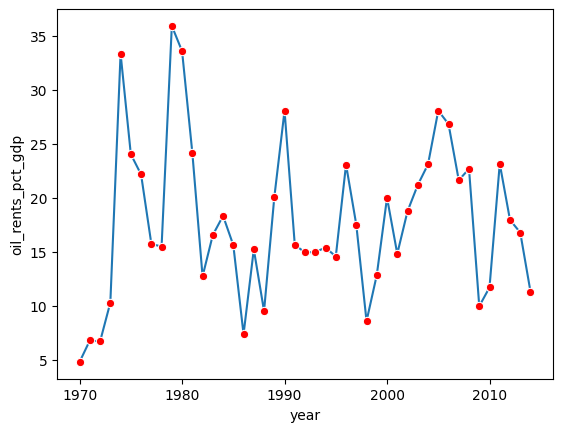

In [16]:
df_proper_pd = df_proper_1.toPandas()

ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["oil_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")

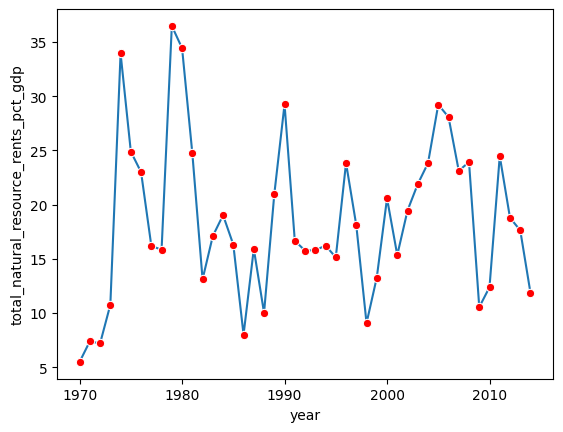

In [17]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["total_natural_resource_rents_pct_gdp"],marker="o")
ax.lines[0].set_markerfacecolor("red")
ax.lines[0].set_markerfacecolor("red")

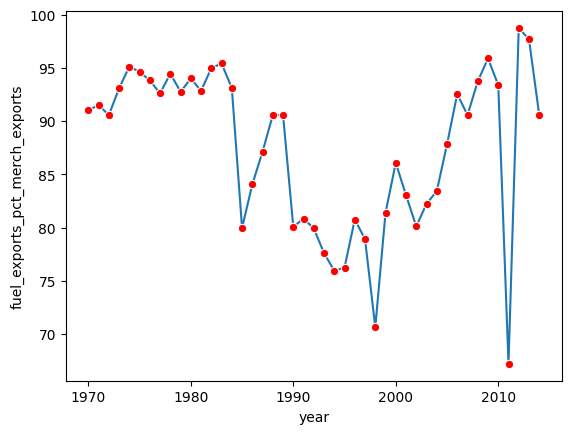

In [18]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["fuel_exports_pct_merch_exports"],marker="o")
ax.lines[0].set_markerfacecolor("red")

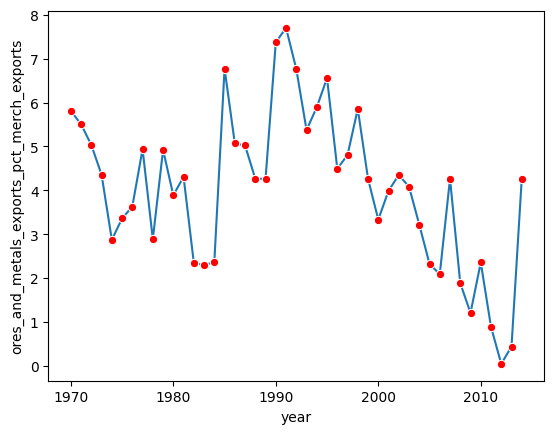

In [19]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["ores_and_metals_exports_pct_merch_exports"],marker="o")
ax.lines[0].set_markerfacecolor("red")

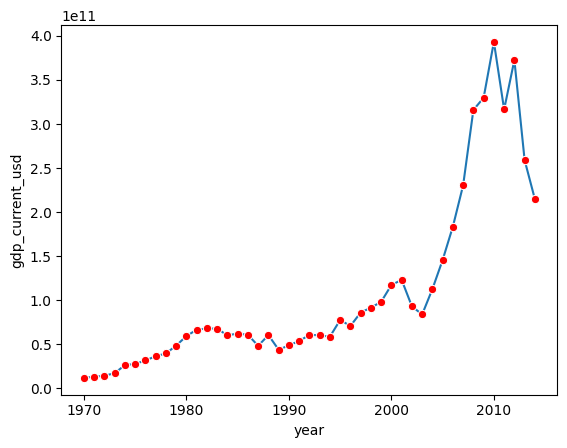

In [20]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["gdp_current_usd"],marker="o")
ax.lines[0].set_markerfacecolor("red")

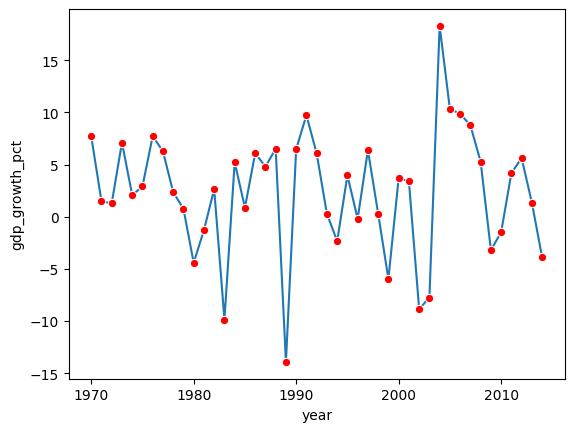

In [21]:
ax = sns.lineplot(x=df_proper_pd["year"],y=df_proper_pd["gdp_growth_pct"],marker="o")
ax.lines[0].set_markerfacecolor("red")

In [22]:
power(10,10)

Column<'POWER(10, 10)'>

In [23]:
df_proper_2 = df_proper_1

colus = df_proper_1.columns[2:]

for i in colus:
    r = round(col(i),2)
    df_proper_2 = df_proper_2.withColumn(i,r)

s = round(col("gdp_current_usd")/power(10,9),2)
df_proper_2 = df_proper_2.withColumn("gdp_current_usd",s)
df_proper_2 = df_proper_2.withColumnRenamed(existing="gdp_current_usd",new="gdp_current_per_billion_usd")

In [24]:
df_proper_2.show()

+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+
|country_iso3|year|oil_rents_pct_gdp|total_natural_resource_rents_pct_gdp|fuel_exports_pct_merch_exports|ores_and_metals_exports_pct_merch_exports|gdp_current_per_billion_usd|gdp_growth_pct|
+------------+----+-----------------+------------------------------------+------------------------------+-----------------------------------------+---------------------------+--------------+
|         VEN|1970|              4.8|                                5.49|                         91.02|                                     5.81|                      11.56|          7.71|
|         VEN|1971|             6.79|                                7.39|                         91.52|                                      5.5|                      12.99|          1.48|
|         VEN|1972|             6.69|        

In [28]:
df_proper_2.toPandas().to_csv("venezuela_economy.csv",index=False)

In [ ]:
df_proper_2.
when(col("oil_rents_pct_gdp")>col("total_natural_resource_rents_pct_gdp"),1).otherwise(0)